# Preparació del dataset

importamos las librerías que vamos a utilizar

In [1]:
pip install kneed

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from kneed import KneeLocator

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Cargamos del dataset

In [4]:
df = pd.read_csv('./Publicacions Facebook Thailandia.csv', encoding='utf-8', sep=',')
df.head(15)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.tail(15)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
7035,1050855161656896_1074576555951423,photo,10/9/2016 8:36,10,0,0,10,0,0,0,0,0,NaN,NaN,NaN,NaN
7036,1050855161656896_1073563326052746,photo,10/8/2016 2:33,236,0,5,235,0,1,0,0,0,NaN,NaN,NaN,NaN
7037,1050855161656896_1070127156396363,photo,10/4/2016 1:49,15,0,1,14,1,0,0,0,0,NaN,NaN,NaN,NaN
7038,1050855161656896_1067647913310954,photo,10/1/2016 1:17,1,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN
7039,1050855161656896_1063592313716514,photo,9/26/2016 5:48,7,0,0,7,0,0,0,0,0,NaN,NaN,NaN,NaN
7040,1050855161656896_1063071050435307,photo,9/25/2016 13:29,93,26,34,90,3,0,0,0,0,NaN,NaN,NaN,NaN
7041,1050855161656896_1062020473873698,photo,9/24/2016 8:15,9,0,0,7,2,0,0,0,0,NaN,NaN,NaN,NaN
7042,1050855161656896_1061944223881323,photo,9/24/2016 6:07,4,0,0,4,0,0,0,0,0,NaN,NaN,NaN,NaN
7043,1050855161656896_1061918183883927,photo,9/24/2016 5:07,196,2,3,195,1,0,0,0,0,NaN,NaN,NaN,NaN
7044,1050855161656896_1061906620551750,photo,9/24/2016 4:37,86,0,0,86,0,0,0,0,0,NaN,NaN,NaN,NaN


Como podemos observar, nuestro dataset recoge las reacciones de una serie de publicaciones en Facebook durante un periodo de tiempo concreto.  

Las variables son las siguientes:

**status_id**: id de cada publicación.  
**status_type**: tipo de publicación.  
**status_published**: fecha de la publicación.  
**num_reactions**: reacciones.  
**num_comments**: comentarios.  
**num_shares**: compartidos.  
**num_likes**: me gusta.  
**num_loves**: emoji corazón.  
**num_wows**: emoji sorprendido.  
**num_hahas**: emoji risas.  
**num_sads**: emoji triste.  
**num_angrys**: emoji enfadado.  
**Column1**: NaN  
**Column2**: NaN  
**Column3**: NaN  
**Column4**: NaN  

### Comprobamos las columnas que tiene el dataset

In [6]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

### Comprobamos el número de filas y columnas que contiene el dataset

In [7]:
df.shape

(7050, 16)

### Comprobamos el tamaño del dataset

In [8]:
df.size

112800

### Comprobamos el tipo de valores que tiene cada una de las columnas

In [9]:
df.dtypes

status_id            object
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

### Contamos el número de valores únicos de cada columna.

In [10]:
df.nunique()

status_id           6997
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
Column1                0
Column2                0
Column3                0
Column4                0
dtype: int64

### Comprobamos si existen valores NaN en cada columna.

In [11]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

### Comprobamos si existen filas duplicadas.

In [12]:
df.duplicated().sum()

51

**Observamos**:  

· La variable **status_id** tiene dos bloques de números, comprobamos que el primer bloque de número varia, cuando hemos visualizado las últimas filas del dataset. Comprobamos que existen datos duplicados, esto nos dice que se ha registrado dos veces el mismo dato. Para ello eliminaremos los datos duplicados para poder realizar correctamente la clausterización.  

· Existen 3 columnas que tienen valores NaN (Column1, Column2, Column3) procedemos a eliminarlas.  

· La variable **status_published**, son valores fecha y hora, para la clausterización NO la vamos a necesitar, así que eliminamos.

### Eliminamos los datos duplicados de la variable status_id

In [13]:
df = df.drop_duplicates(subset='status_id', keep='last')

### Comprobamos que no hayan datos duplicados 

In [14]:
df.duplicated().sum()

0

### Eliminamos la columna status_id porque no la vamos a utilizar para la clausterización.

In [15]:
df.drop(['status_id'], axis=1, inplace=True)
df.columns

Index(['status_type', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4'],
      dtype='object')

### Eliminamos la columna Status_published porque no la vamos a utilizar para la clausterización

Eliminamos Status_published fecha de publicación, ya que es irrelevante para la clusterización que vamos a realizar que será en función de la reacción a la publicación.

In [16]:
df.drop(['status_published'], axis=1, inplace=True)
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4'],
      dtype='object')

### Eliminamos las columnas con valores NaN

In [17]:
df.drop(['Column1','Column2','Column3','Column4'], axis=1, inplace=True)
df.columns

Index(['status_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys'],
      dtype='object')

### Comprobamos el número de filas y columnas del dataset una vez eliminadas las columnas.

In [18]:
df.shape

(6997, 10)

### Comprobamos el tamaño del dataset una vez eliminadas las columnas.

In [19]:
df.size

69970

In [20]:
df.dtypes

status_type      object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
dtype: object

In [21]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [22]:
df.tail()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0
7049,photo,17,0,0,17,0,0,0,0,0


### Realizamos un análisis estadístico del dataset

Observamos que el número de reacciones y el número de likes tienen el mísmo máximo.

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6997.0,224.951979,452.930082,0.0,17.0,58.0,216.0,4710.0
num_comments,6997.0,225.613977,892.863091,0.0,0.0,4.0,22.0,20990.0
num_shares,6997.0,40.269973,132.064065,0.0,0.0,0.0,4.0,3424.0
num_likes,6997.0,209.899814,439.595761,0.0,17.0,57.0,182.0,4710.0
num_loves,6997.0,12.755181,40.112024,0.0,0.0,0.0,3.0,657.0
num_wows,6997.0,1.253251,8.726772,0.0,0.0,0.0,0.0,278.0
num_hahas,6997.0,0.698156,3.971462,0.0,0.0,0.0,0.0,157.0
num_sads,6997.0,0.232671,1.481312,0.0,0.0,0.0,0.0,51.0
num_angrys,6997.0,0.110190,0.688678,0.0,0.0,0.0,0.0,31.0


## Gestión de Dummies

La variable Status_type: nos indica de el tipo de publicación en Facebook, como veremos a continuación tenemos cuatro tipos. Vamos a proceder a descomponer en dummies.

### 1. Comprobamos el nombre de variables que tiene la columna status_type (que en total son 4)

In [24]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

### 2.Comprobamos si existen valores - en la columna status_type

In [25]:
df['status_type'].isnull().any()

False

### 3. Conteamos las variables de la columna status_type

In [26]:
df["status_type"].value_counts()

status_type
photo     4242
video     2333
status     359
link        63
Name: count, dtype: int64

### 4. Visualizamos la columna status_type en un histograma.

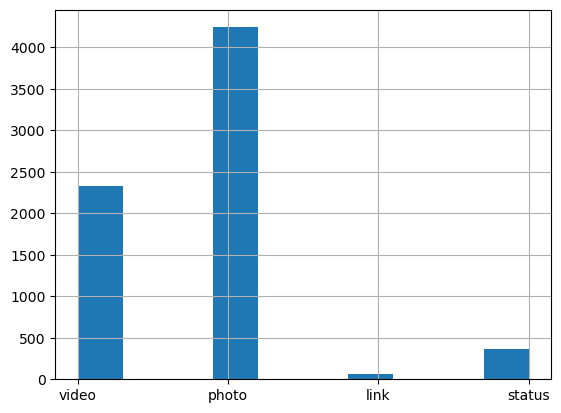

In [27]:
df.status_type.hist();

### 5. Realizamos un OneHotEncoder

Para poder utilizar datos númericos cuando hagamos el modelo de clausterización.

Aplicamos one-hot encoding para 'status_type'

In [28]:
status_type_encoded = pd.get_dummies(df['status_type'], prefix='status_type')

Concatenanamos el DataFrame original con las nuevas columnas one-hot encoded

In [29]:
df = pd.concat([df, status_type_encoded], axis=1)

Eliminamos la columna original después del one-hot encoding

In [30]:
df.drop('status_type', axis=1, inplace=True)

Convierte las columnas one-hot encoded a binario (0 o 1)

In [31]:
df[['status_type_video', 'status_type_photo', 'status_type_link', 'status_type_status']] = \
    df[['status_type_video', 'status_type_photo', 'status_type_link', 'status_type_status']].apply(lambda x: x.astype(int))

Comprobamos que se han creado correctamente las columnas

In [32]:
df.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type_link',
       'status_type_photo', 'status_type_status', 'status_type_video'],
      dtype='object')

In [33]:
df

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,0,1,0,0


# Análisis descriptivo y visual de los datos

A continuación observaremos los comportamientos estadísticos, descriptivos y visuales de los datos.

### 1. Comprobamos el formato de los valores.

In [34]:
df.dtypes

num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
status_type_link      int32
status_type_photo     int32
status_type_status    int32
status_type_video     int32
dtype: object

### Observamos que las nuevas columnas que hemos creado son datos booleanos (True, False)

In [35]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 6997 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_reactions       6997 non-null   int64
 1   num_comments        6997 non-null   int64
 2   num_shares          6997 non-null   int64
 3   num_likes           6997 non-null   int64
 4   num_loves           6997 non-null   int64
 5   num_wows            6997 non-null   int64
 6   num_hahas           6997 non-null   int64
 7   num_sads            6997 non-null   int64
 8   num_angrys          6997 non-null   int64
 9   status_type_link    6997 non-null   int32
 10  status_type_photo   6997 non-null   int32
 11  status_type_status  6997 non-null   int32
 12  status_type_video   6997 non-null   int32
dtypes: int32(4), int64(9)
memory usage: 656.0 KB


### 2. Comprobamos los datos únicos por cada columna.

In [36]:
df.nunique()

num_reactions         1067
num_comments           993
num_shares             501
num_likes             1044
num_loves              229
num_wows                65
num_hahas               42
num_sads                24
num_angrys              14
status_type_link         2
status_type_photo        2
status_type_status       2
status_type_video        2
dtype: int64

### 3. Analisis descriptivo.

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6997.0,224.951979,452.930082,0.0,17.0,58.0,216.0,4710.0
num_comments,6997.0,225.613977,892.863091,0.0,0.0,4.0,22.0,20990.0
num_shares,6997.0,40.269973,132.064065,0.0,0.0,0.0,4.0,3424.0
num_likes,6997.0,209.899814,439.595761,0.0,17.0,57.0,182.0,4710.0
num_loves,6997.0,12.755181,40.112024,0.0,0.0,0.0,3.0,657.0
num_wows,6997.0,1.253251,8.726772,0.0,0.0,0.0,0.0,278.0
num_hahas,6997.0,0.698156,3.971462,0.0,0.0,0.0,0.0,157.0
num_sads,6997.0,0.232671,1.481312,0.0,0.0,0.0,0.0,51.0
num_angrys,6997.0,0.110190,0.688678,0.0,0.0,0.0,0.0,31.0
status_type_link,6997.0,0.009004,0.094467,0.0,0.0,0.0,0.0,1.0


### Calculamos la mediana para las columnas numéricas

Observamos que la mediana de las reacciónes es 58 y del número de likes 57.

In [38]:
df.median()

num_reactions         58.0
num_comments           4.0
num_shares             0.0
num_likes             57.0
num_loves              0.0
num_wows               0.0
num_hahas              0.0
num_sads               0.0
num_angrys             0.0
status_type_link       0.0
status_type_photo      1.0
status_type_status     0.0
status_type_video      0.0
dtype: float64

Correlación entre columnas.

In [39]:
df.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
num_reactions,1.000000,0.156218,0.259680,0.994672,0.310690,0.261717,0.179681,0.082112,0.136084,0.030557,-0.144434,0.111832,0.091227
num_comments,0.156218,1.000000,0.640528,0.105964,0.521310,0.163498,0.325056,0.257537,0.239549,-0.023479,-0.292059,-0.049279,0.330443
num_shares,0.259680,0.640528,1.000000,0.179705,0.820279,0.409797,0.399855,0.218618,0.332347,-0.025894,-0.354980,-0.066380,0.404140
num_likes,0.994672,0.105964,0.179705,1.000000,0.212760,0.200039,0.123154,0.057129,0.096298,0.034635,-0.112900,0.121497,0.053206
num_loves,0.310690,0.521310,0.820279,0.212760,1.000000,0.510144,0.507892,0.226564,0.394810,-0.029596,-0.352689,-0.065089,0.401902
num_wows,0.261717,0.163498,0.409797,0.200039,0.510144,1.000000,0.288463,0.091419,0.191667,-0.011609,-0.090285,-0.001998,0.096829
num_hahas,0.179681,0.325056,0.399855,0.123154,0.507892,0.288463,1.000000,0.154029,0.225077,-0.015996,-0.159739,-0.034360,0.184831
num_sads,0.082112,0.257537,0.218618,0.057129,0.226564,0.091419,0.154029,1.000000,0.143704,-0.014973,-0.089065,0.018574,0.086611
num_angrys,0.136084,0.239549,0.332347,0.096298,0.394810,0.191667,0.225077,0.143704,1.000000,-0.015252,-0.126767,-0.028746,0.147884
status_type_link,0.030557,-0.023479,-0.025894,0.034635,-0.029596,-0.011609,-0.015996,-0.014973,-0.015252,1.000000,-0.118278,-0.022167,-0.067415


### Visualizamos la matriz de correlación

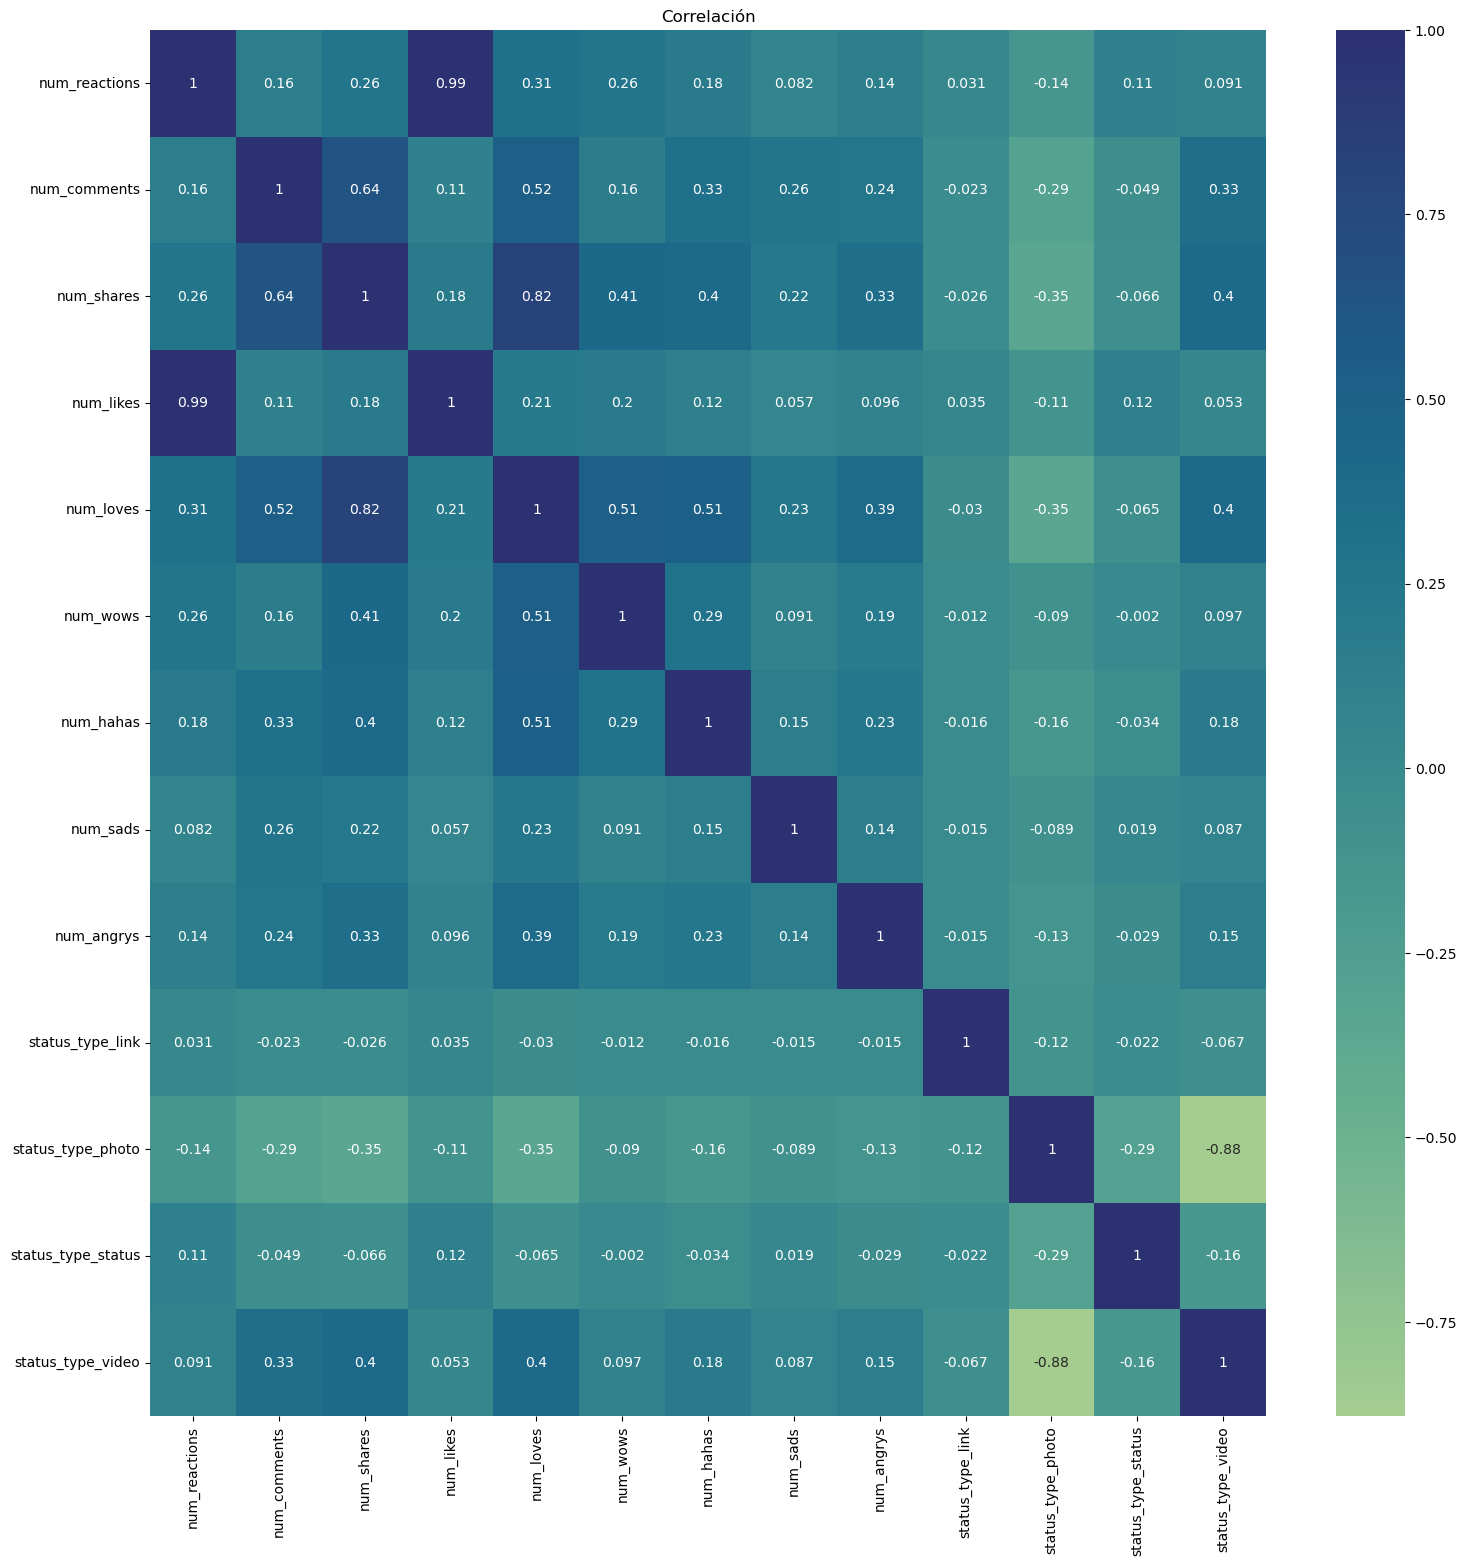

In [40]:
plt.figure(figsize=(18, 18))
matriz_corr = df.corr()
sns.heatmap(matriz_corr, annot=True, linecolor='white', cmap="crest")
plt.title('Correlación')
plt.show()

En la matriz de correlación observamos que las variables **num_rections** y **num_likes** son las que tienen mayor correlación, con un **0.99**. Después las variables **num_loves** y **num_shares** tiene una correlación de **0.82**, y las variables **num_comments** y **num_shares** tienen una correlación de **0.64**.

### Vamos a visualizar la distribución estadística de nuestro conjunto de datos para identificar posibles outliers.

Text(0.5, 1.0, 'Outliers')

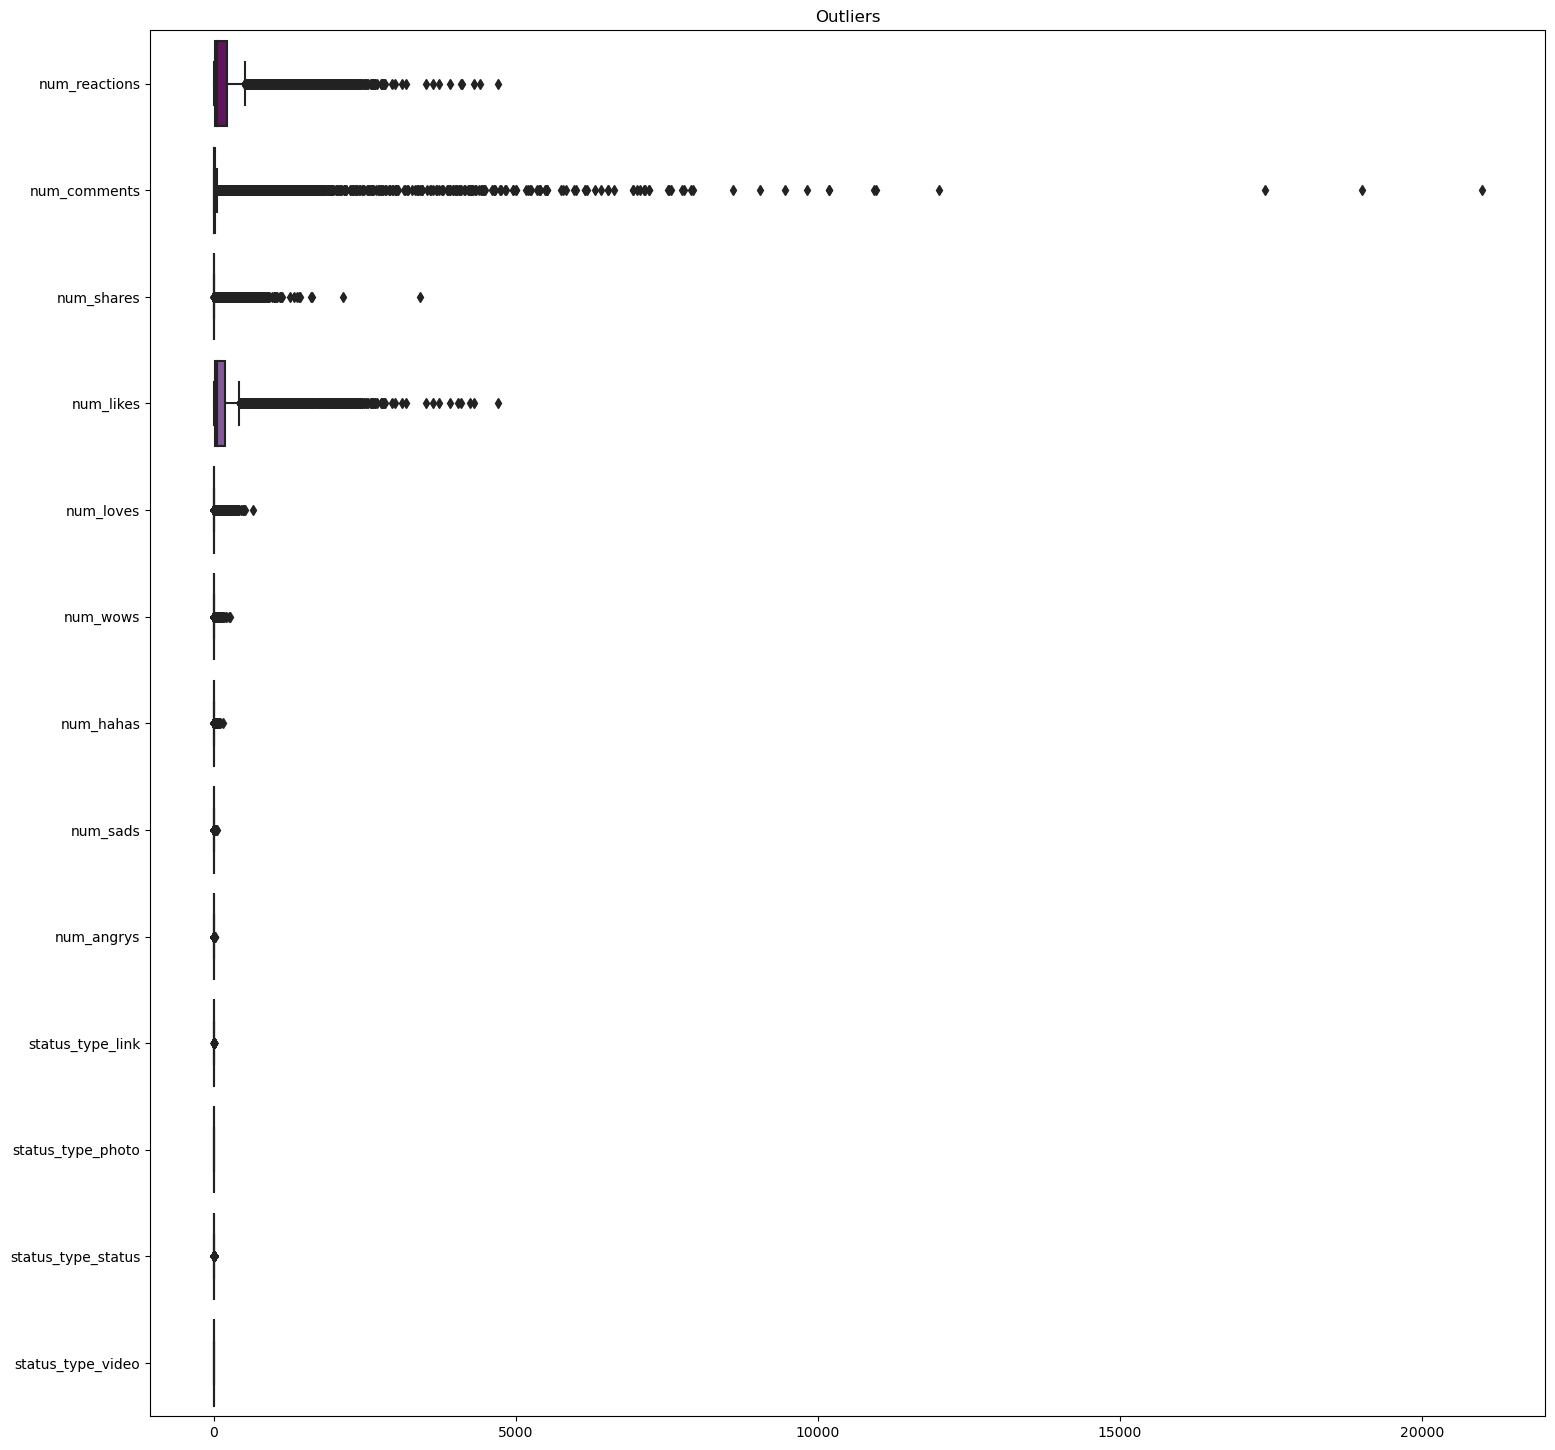

In [41]:
plt.figure(figsize=(18, 18))
sns.boxplot(data=df, orient='h', palette= 'BuPu_r')
plt.title('Outliers')

Identificamos que en la variable num_comments hay 3 outliers. Haremos un robust skaler para normalizar los datos.

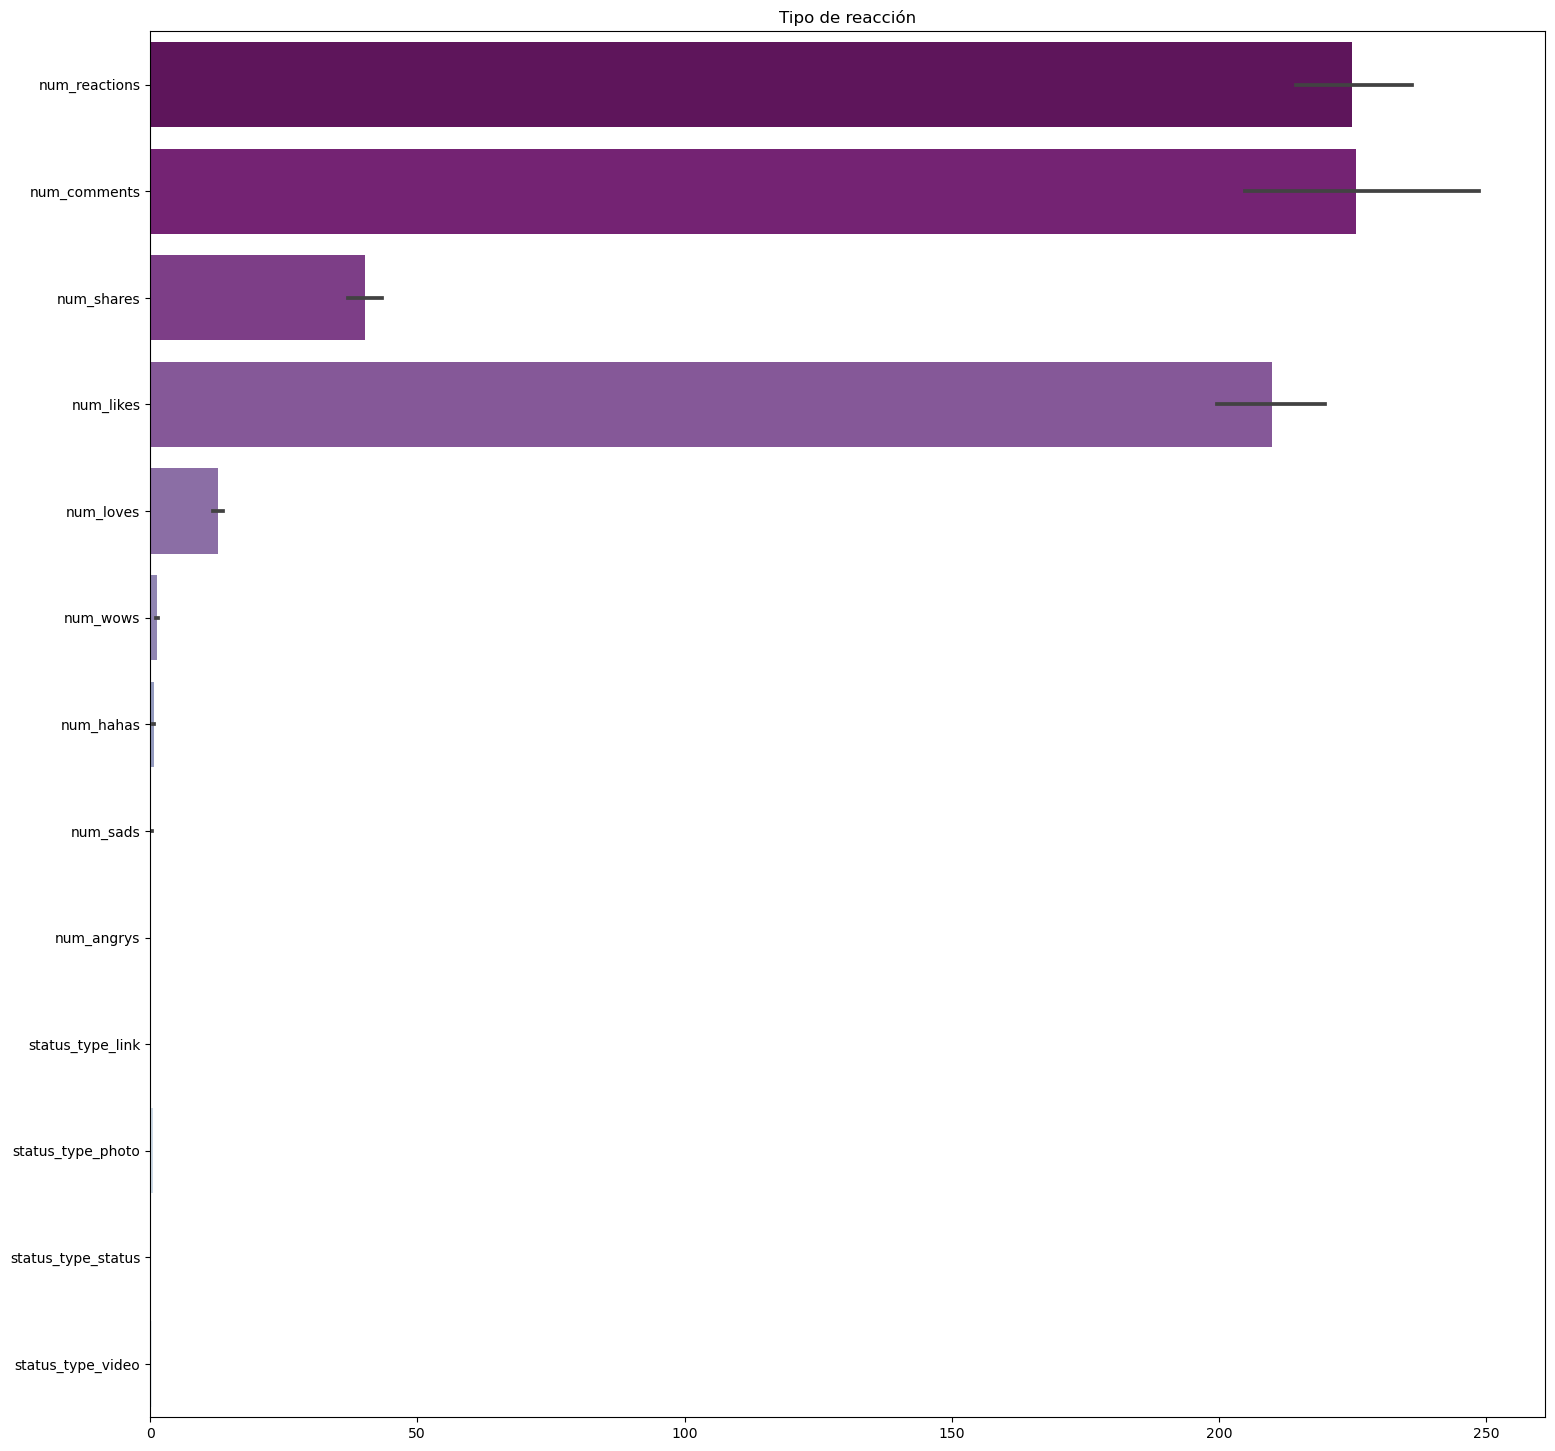

In [42]:
plt.figure(figsize=(18,18))
Barplot = sns.barplot(data=df, orient='h', palette= 'BuPu_r')
plt.title('Tipo de reacción')
plt.show()

<Figure size 1200x1200 with 0 Axes>

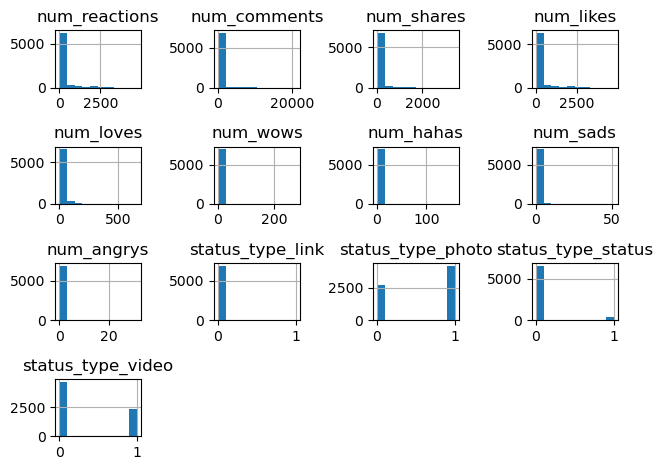

In [43]:
plt.figure(figsize = (12,12))
df.hist()
plt.tight_layout()

## Procesado de datos

Tras observar nuestros datos procedemos a preprocesarlos para facilitar nuestro modelado y viendo que nuestras columnas de reacciones cuentan todas con outliers vamos a utilizar Robust Scaler.

[link documentació](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

Primero vamos a hacer una copia del conjunto de datos.

In [44]:
df.b = df.copy()
df.b

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,89,0,0,89,0,0,0,0,0,0,1,0,0
7046,16,0,0,14,1,0,1,0,0,0,1,0,0
7047,2,0,0,1,1,0,0,0,0,0,1,0,0
7048,351,12,22,349,2,0,0,0,0,0,1,0,0


Comprobamos que se mantienen las mismas columnas

In [46]:
df.b.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'status_type_link',
       'status_type_photo', 'status_type_status', 'status_type_video'],
      dtype='object')

### Vamos a utilizar el escalador robusto para normalizar (escalar) los valores en las columnas especificadas.

El escalado robusto es útil cuando se tienen datos con presencia de outliers, ya que se basa en percentiles y es menos sensible a valores atípicos en comparación con el escalado estándar.

In [47]:
rs = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
Robust_scaler = preprocessing.RobustScaler().fit(df.b[rs])
df.b[rs] = Robust_scaler.transform(df.b[rs])

df.b.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0


### Visualizamos 

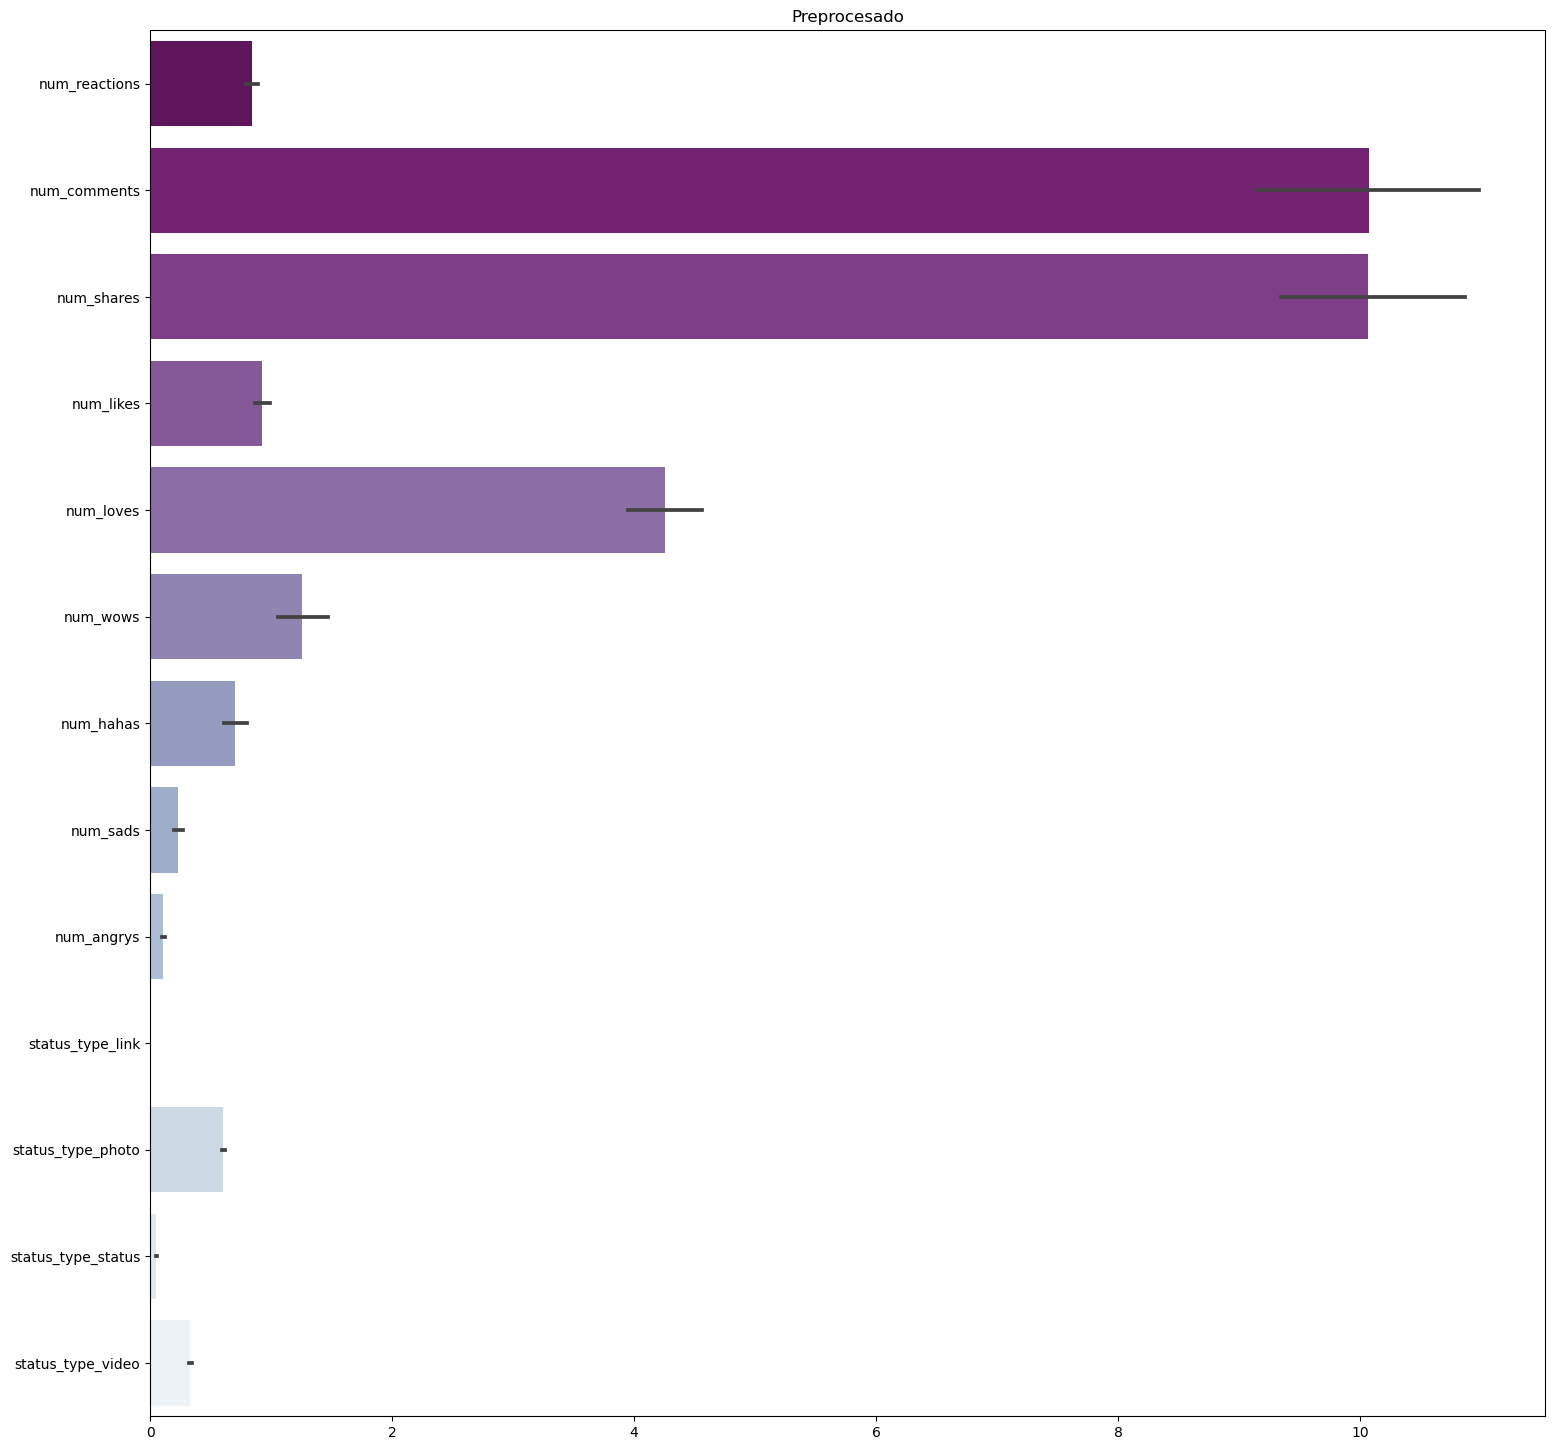

In [48]:
plt.figure(figsize=(18,18))
Barplot = sns.barplot(data=df.b, orient='h', palette= 'BuPu_r')
plt.title('Preprocesado')
plt.show()

<Figure size 1200x1200 with 0 Axes>

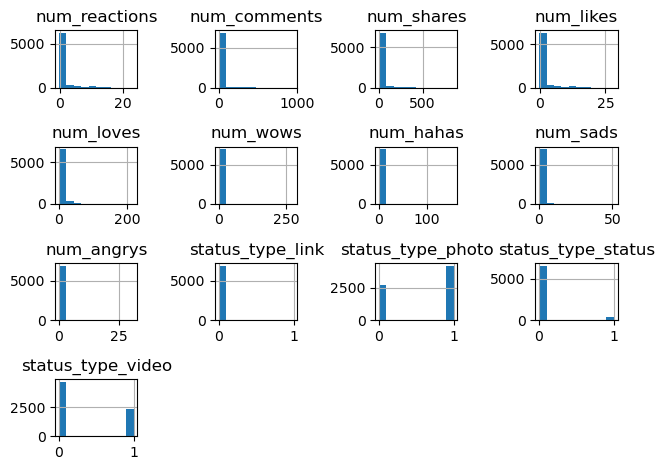

In [49]:
plt.figure(figsize = (12,12))
df.b.hist()
plt.tight_layout()

Podemos observar que los datos están normalizados, ahora ya podemos proceder.

## Análisis de componentes principales (PCA)

Mediante este método vamos a simplificar la complejidad de nuestro dataframe. Con este método reduciremos la dimensionalidad de los datos obteniendo una combinación lineal de variables que capture la mayor cantidad de varianza posible en los datos.

Primero vamos a excluir la columna fecha antes de aplicar PCA.

In [50]:
pca = PCA().fit(df.b)

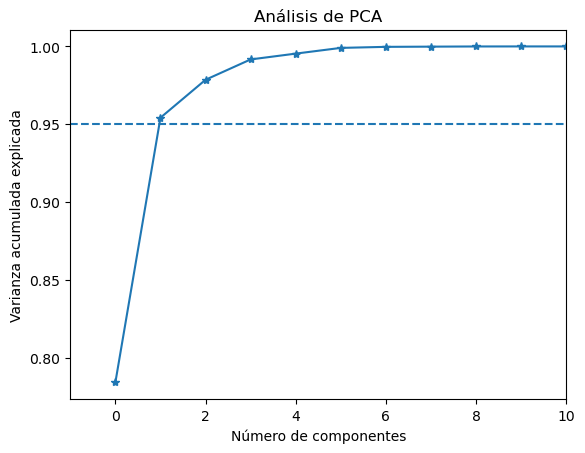

In [51]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="*")
plt.axhline(0.95, linestyle='--')
plt.xlim([-1, 10])
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada explicada')
plt.title('Análisis de PCA')
plt.show()

Observamos que dicha combinación lineal la encontramos entre 1 y 2.  

Vamos a analizar por tanto a qué número de dimensiones debemos reducir nuestros datos, conservando el 95% de la varianza de los mismos.

In [52]:
pca = PCA(0.95).fit(df)
print(pca.n_components_)

2


Para conservar el 95% de la varianza hemos de utilizar 2 componentes para realizar la agrupación de todas nuestras variables.

In [53]:
pca = PCA(n_components=2)
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df), columns=['Componente 1', 'Componente 2'], index=df.index)
df_pca.head()

,Componente 1,Componente 2
0,370.680471,318.513449
1,-242.153356,-54.029712
2,11.614345,-4.216753
3,-251.910408,-108.281043
4,-227.171167,27.476544


# Exercici 1

Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

Vamos a utilizar el **método Elbow** el cual calcula la varianza total intra-cluster en función del número de clusters y escoge como óptimo aquel valor a partir del cual añadir más clusters apenas consigue mejoría.

In [58]:
!pip install --upgrade kneed
ks = range(1, 10)
SSE = []

for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(df.b)
    SSE.append(model.inertia_)

Text(0.5, 1.0, 'Método del codo para la elección de k')

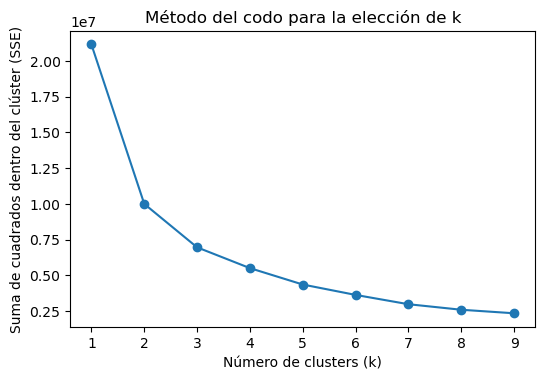

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(ks, SSE, marker='o', linestyle='-')
ax.set_xlabel('Número de clusters (k)')
ax.set_ylabel('Suma de cuadrados dentro del clúster (SSE)')
ax.set_title('Método del codo para la elección de k')

### Utilizamos el la libreria KneeLocator para encontrar el codo

In [60]:
kl = KneeLocator(ks, SSE, curve="convex", direction="decreasing")
print('El codo lo tenemos en el número de cluster (k):',kl.elbow)

El codo lo tenemos en el número de cluster (k): 3


### Iniciamos

In [61]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(df.b)

KMeans(n_clusters=3, random_state=42)

### Predecimos

In [62]:
predicts = km.predict(df.b)
predicts

array([0, 1, 1, ..., 1, 1, 1])

In [63]:
df_cluster = df.b.copy()

df_cluster['Cluster K-means'] = predicts
df_cluster.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,Cluster K-means
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,0
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,1
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,1
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,1
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,1


In [64]:
df_cluster['Cluster K-means'].value_counts()

Cluster K-means
1    6373
0     520
2     104
Name: count, dtype: int64

### Visualizamos con un Gráfico de dispersión para los dos primeros componentes principales

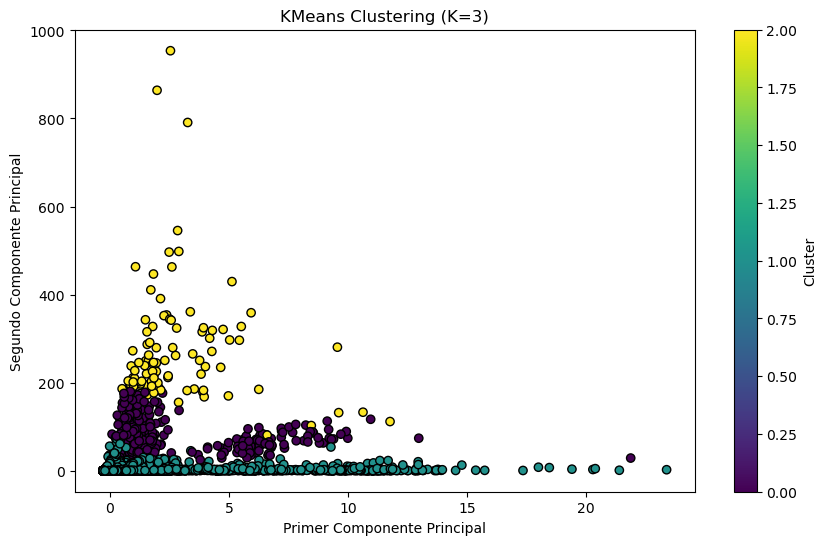

In [65]:
plt.figure(figsize=(10, 6)) 
plt.scatter( x=df.b.iloc[:, 0], y=df.b.iloc[:, 1], c=df_cluster['Cluster K-means'], cmap='viridis', marker='o', edgecolor='black' ) 
plt.title('KMeans Clustering (K=3)')
plt.xlabel('Primer Componente Principal') 
plt.ylabel('Segundo Componente Principal') 
plt.colorbar(label='Cluster') 
plt.show()

## Exercici 2

Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

Los resultados del **hierarchical clustering** pueden representarse como un árbol en el que las ramas representan la jerarquía con la que se van sucediendo las uniones de clusters.

[link documentación](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)

### Denograma

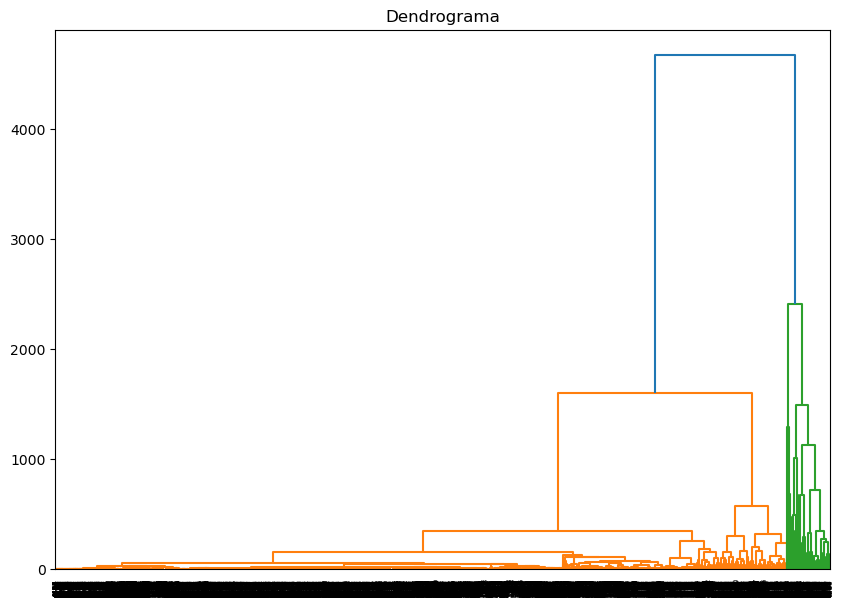

In [66]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dendrograma = shc.dendrogram(shc.linkage(df.b, method='ward'))

### Cortamos el dendograma para generar los clusters.

Para identificar el número de clusters creados y qué observaciones forman parte de cada uno. Si se realiza un corte horizontal a una determinada altura del dendrograma, el número de ramas que sobrepasan (en sentido ascendente) dicho corte se corresponde con el número de clusters.  

La siguiente imagen muestra **2 clusters.**

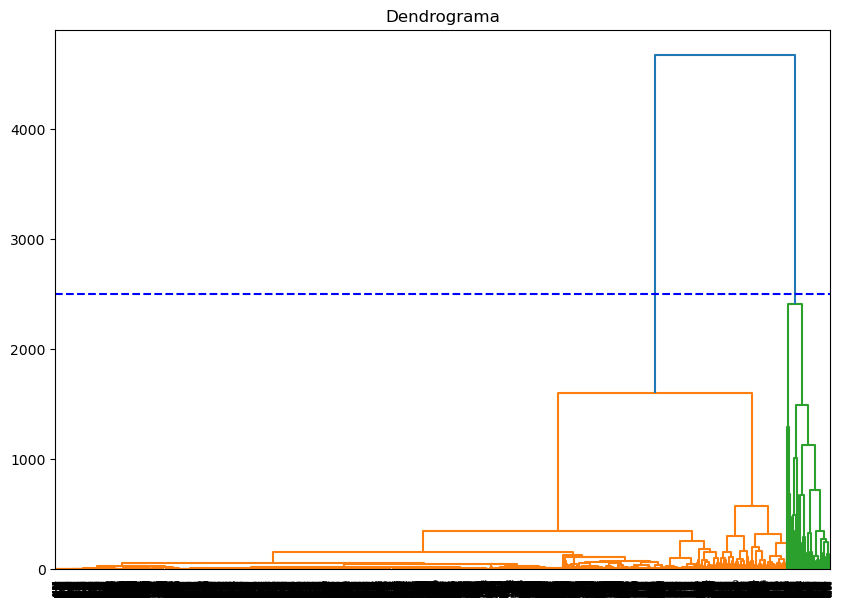

In [67]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dendrograma = shc.dendrogram(shc.linkage(df.b, method='ward'))
plt.axhline(y=2500, color='blue', linestyle='--')

### Agglomerative clustering 

Los métodos que engloba el hierarchical clustering se subdividen en dos tipos dependiendo de la estrategia que vayas a emplear, nosotros vamos a escoger:

**· Aglomerativo (agglomerative clustering o bottom-up)**: el agrupamiento se inicia con todas las observaciones separadas, cada una formando un cluster individual. Los clusters se van combinado a medida que la estructura crece hasta converger en uno solo.

[link documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [68]:
aglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
aglo.fit(df.b)

predicts_aglo = aglo.labels_

predicts_aglo

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Agregamos la columna 'Cluster Agglomerative' con las predicciones al DataFrame df.b

In [70]:
df.b['Cluster Agglomerative'] = predicts_aglo

### Visualizamos 

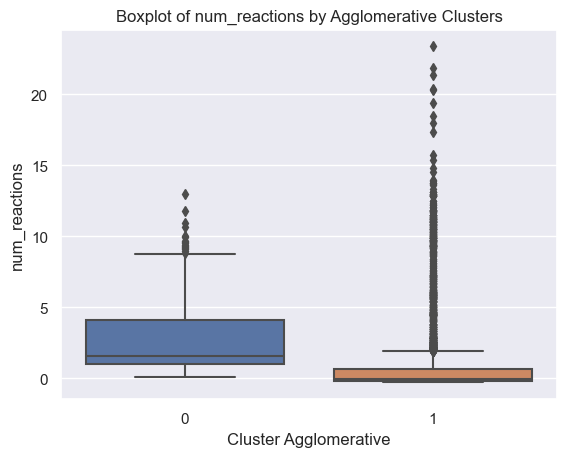

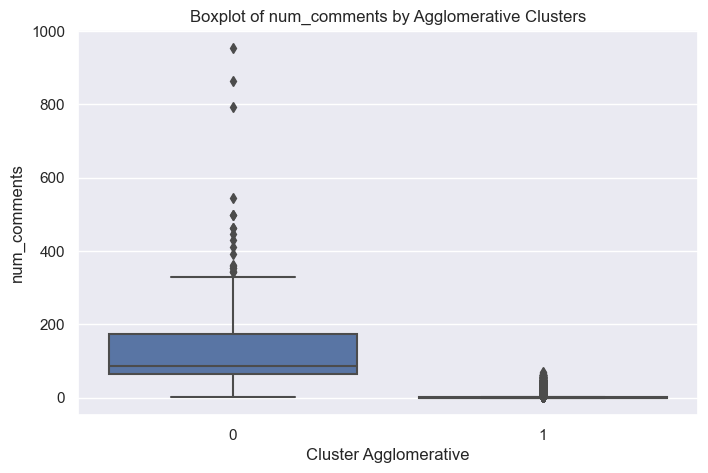

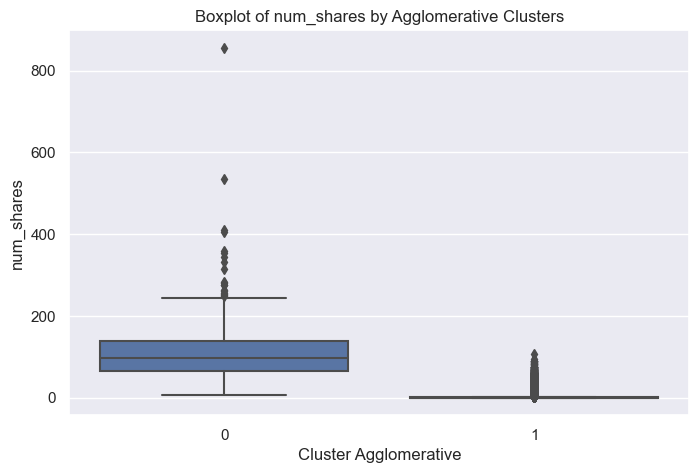

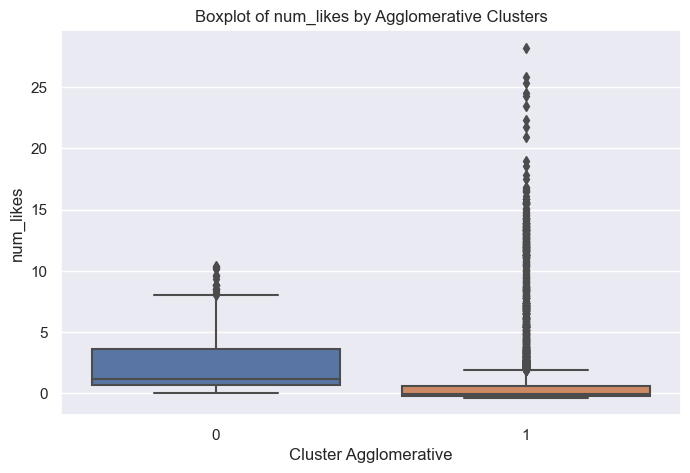

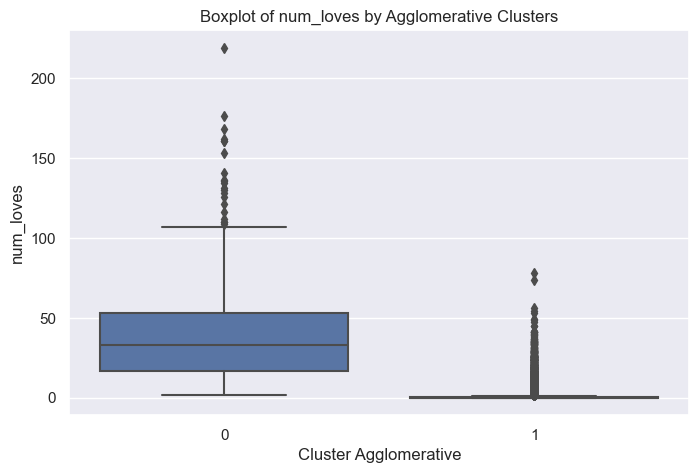

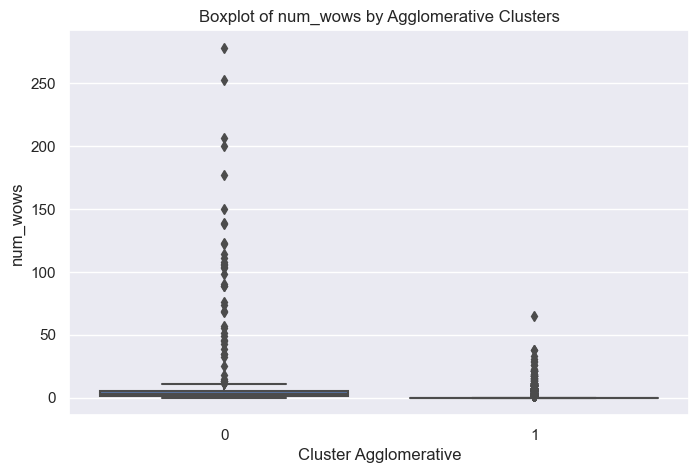

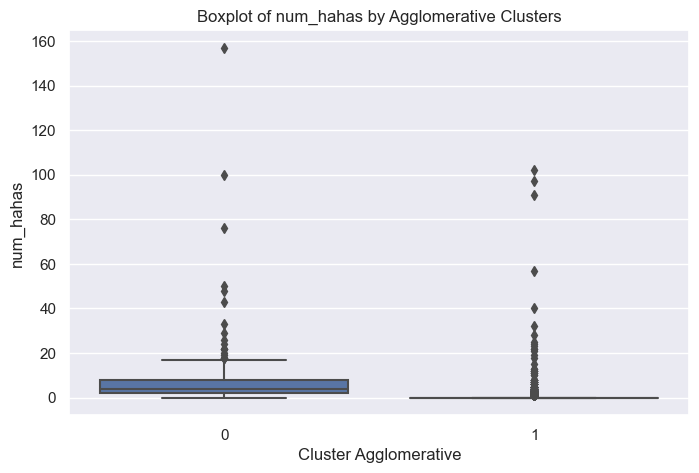

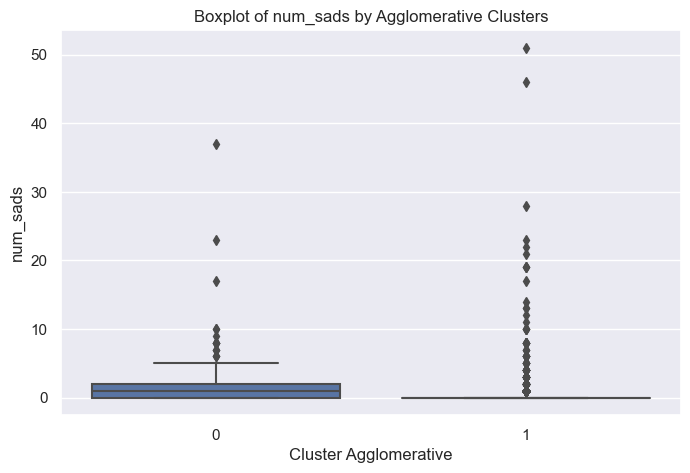

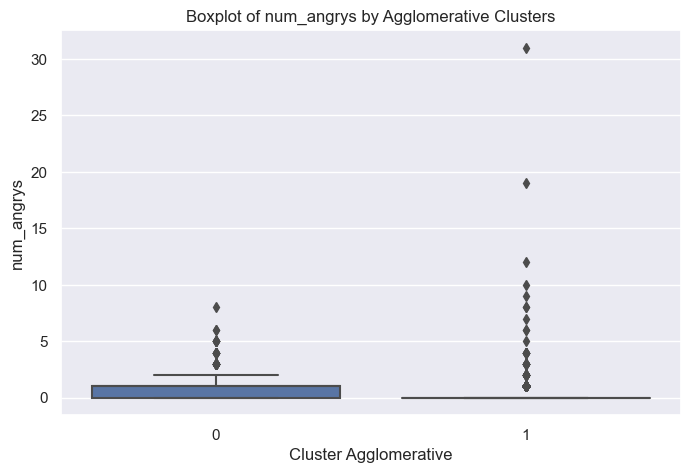

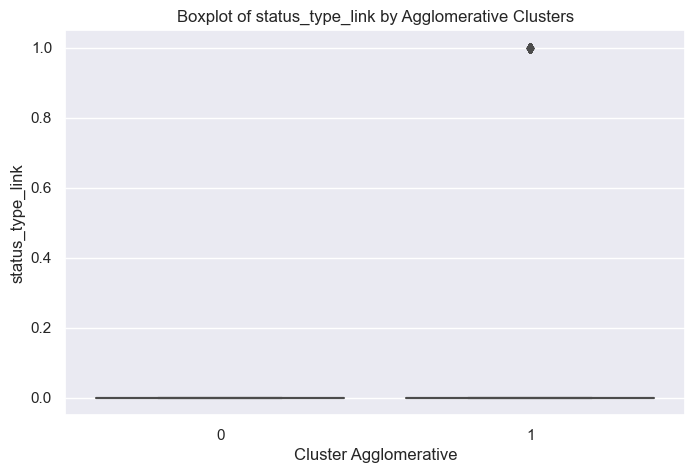

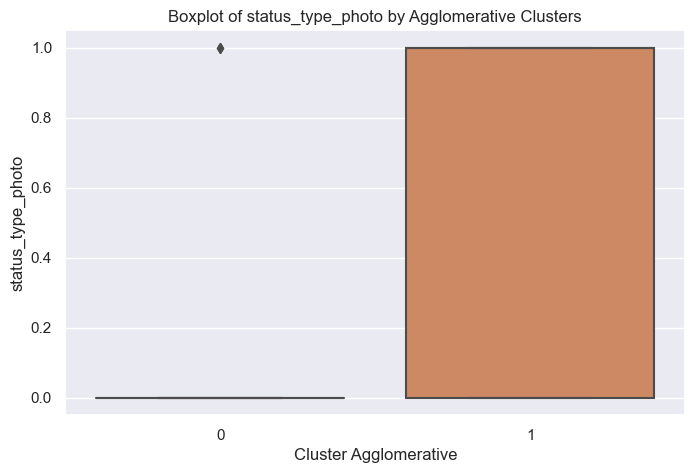

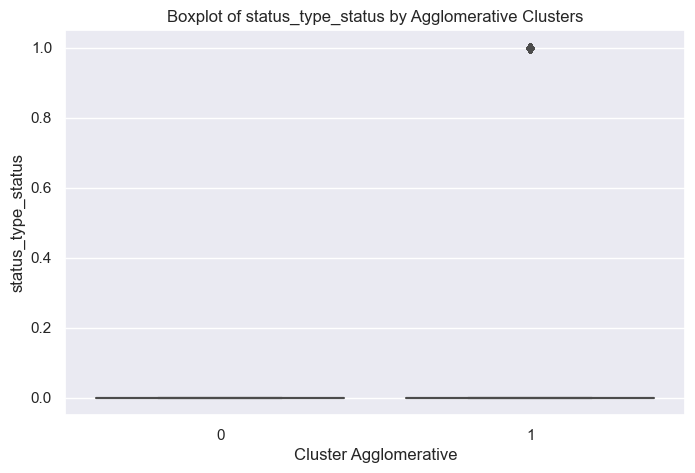

In [71]:
columns = df.b.columns[:-2]

for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel=i, ylabel='Frequency')
    sns.boxplot(x='Cluster Agglomerative', y=i, data=df.b)
    plt.title(f'Boxplot of {i} by Agglomerative Clusters')
    plt.show()

**Conclusiones**: En este caso también destacan las variables número de reacciones y número de comentarios como fuentes de las agrupaciones que realiza el algoritmo de agrupamiento jerarquico en su forma aglomerativa.

## Exercici 3

Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

Otra forma de identificar potenciales valores óptimos para el número de clusters en modelos hierarchical clustering es mediante los índices silhouette.

[link documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [131]:
score_km = silhouette_score(df, predicts, metric='euclidean')

score_aglo = silhouette_score(df, predicts_aglo, metric='euclidean')

In [132]:
score_km

0.8128176722343412

In [133]:
score_aglo

0.7983924214839551

En ambos casos nuesto silhouette score se aproxima a uno positivo, lo que nos indicaría que los grupos están bien separados entre si y diferenciados. Siendo el valor más cerca a 1 el que nos arroja el modelo de agrupamiento jerárquico.